In [15]:
#auto reload jupyter to update notebook w.r.t changes in other linked files:
%load_ext autoreload
%autoreload 2

In [23]:
from post_train_plot import plot_coefficients, plot_scatter_relationships
from train_and_evaluate import *

In [4]:
df_train, df_test, X_train, y_train, X_test, y_test, predictors, predictands = load_train_test_data(predictand='lwp')
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

Train and test data loaded successfully! Missing values dropped.
X_train shape: (211871, 25), y_train shape: (211871, 1)


In [6]:
# MultiLinear Regression
#train
mlr_model = train_mlr(X_train, y_train)
# Evaluate
mse, rmse, y_pred = evaluate_model(mlr_model, X_test, y_test, "Multi-Linear Regression")


Multi-Linear Regression MSE: 0.660110112861699
Multi-Linear Regression RMSE: 0.8124716074188063


In [9]:
# XGBoost
#train
xgboost = train_xgboost(X_train, y_train)
#Evaluate Models
mse, rmse, y_pred = evaluate_model(xgboost, X_test, y_test, "XGboost")

XGboost MSE: 0.5834734070567699
XGboost RMSE: 0.7638543100989676


In [11]:
random_forest = train_rf(X_train, y_train)
#train
mse, rmse, y_pred = evaluate_model(random_forest, X_test, y_test, "Random Forest")


Random Forest MSE: 0.6065960264551209
Random Forest RMSE: 0.7788427482201532


RMSE score with liquid water path as predictand of different models: </br>
MLR = 0.81 ;
XGBoost = 0.76 ;
Random Forest = 0.79



MLR Coefficients:
          blh      cape     mlspf     mslhf     msshf      q700      q850  \
lwp  0.262395  0.007807  0.173711  0.126561 -0.133808 -0.398752 -0.154739   

       rh700     rh850       sst  ...      u850      v10      v700      v850  \
lwp  0.20536  0.287342  0.051313  ... -0.087422 -0.08063  0.018364  0.070166   

         w700      w850  Terra_descending      lsm      eis      lnNd  
lwp  0.013789 -0.068654          0.079084 -0.00827  0.45196 -0.225004  

[1 rows x 25 columns]


<Figure size 1000x500 with 0 Axes>

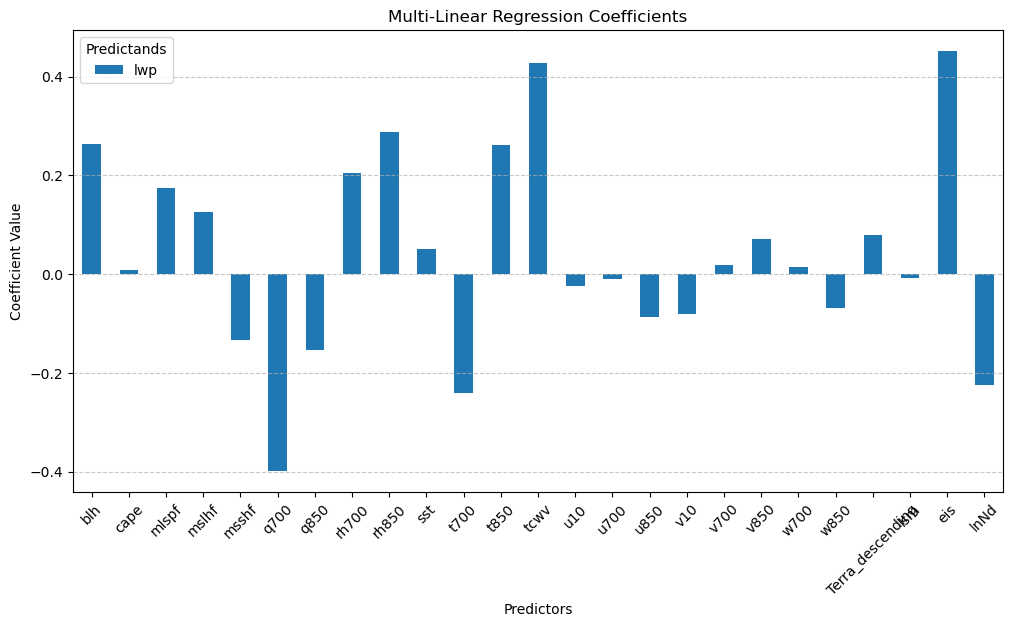

In [18]:
#Getting MLR coefficients
mlr_coefficients = get_mlr_coefficients(mlr_model, predictors, predictands)
#plotting
plot_coefficients(mlr_coefficients)

Major contributors to lwp: </br> eis (0.45) ; tcwv (0.43) ; q700 (-0.40)